# Glitch Classification for Gravitational Wave Interferometry 
### Project work for the course ECS 308 : DSML

In [35]:
# Importing the necessary packages
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl
mpl.rcParams.update({'font.size': 14})

# Sklearn classifiers
#!pip install sklearn
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
df_labels= pd.read_csv('C:/Users/DRA/Dropbox/My PC (DESKTOP-MR1852M)/Desktop/Updated GWave data/glitch_trn_class_labels.csv')
df_test= pd.read_csv('C:/Users/DRA/Dropbox/My PC (DESKTOP-MR1852M)/Desktop/Updated GWave data/glitch_tst_data.csv')
df_train= pd.read_csv('C:/Users/DRA/Dropbox/My PC (DESKTOP-MR1852M)/Desktop/Updated GWave data/glitch_trn_data.csv')

In [4]:
df_labels.info

<bound method DataFrame.info of          d1                 Blip
0        d2       Extremely_Loud
1        d3          Violin_Mode
2        d4                 Blip
3        d5             Scratchy
4        d6             Koi_Fish
...     ...                  ...
5994  d5996          1400Ripples
5995  d5997  Low_Frequency_Burst
5996  d5998      Scattered_Light
5997  d5999                 Blip
5998  d6000  Low_Frequency_Burst

[5999 rows x 2 columns]>

In [5]:
df_train.isnull()

,id,GPStime,centralFreq,peakFreq,snr,ifo,bandwidth,duration
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
5995,False,False,False,False,False,False,False,False
5996,False,False,False,False,False,False,False,False
5997,False,False,False,False,False,False,False,False
5998,False,False,False,False,False,False,False,False


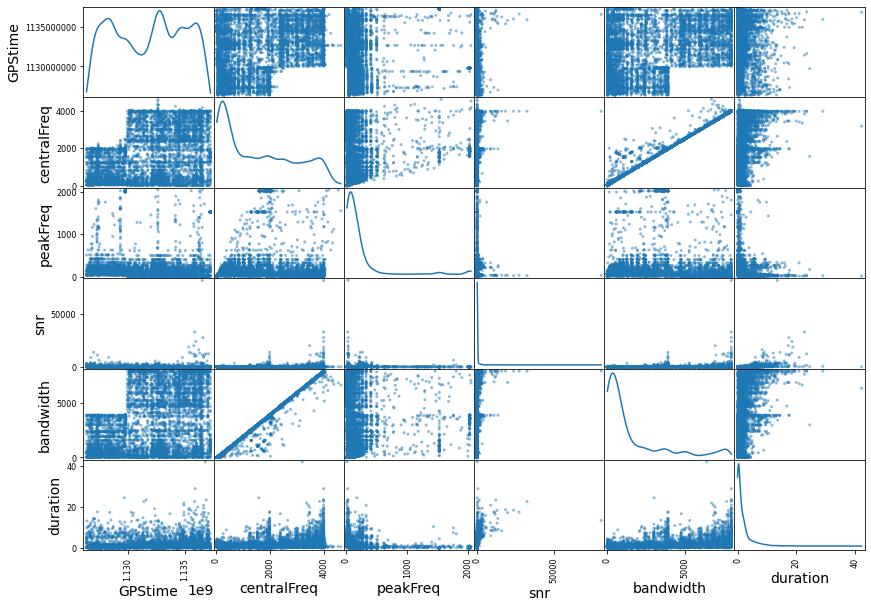

In [6]:
# Show a correlation scatter plot on the train data
scatter_matrix(df_train, diagonal="kde", figsize=(14,10))
plt.savefig("scatter_matrix_train.png", bbox_inches='tight', facecolor='w')

In [7]:
df_labels.head()

,d1,Blip
0,d2,Extremely_Loud
1,d3,Violin_Mode
2,d4,Blip
3,d5,Scratchy
4,d6,Koi_Fish


In [8]:
df_labels.isnull().sum()

d1      0
Blip    0
dtype: int64

In [9]:
df_test.size


5336

In [10]:
df_test.isnull().values.any()

False

In [11]:
df_trn_labels= pd.read_csv('C:/Users/DRA/Dropbox/My PC (DESKTOP-MR1852M)/Desktop/Updated GWave data/glitch_trn_class_labels.csv', names=[ 'did' , 'glitch label'])

In [13]:
df_trn_labels.head()

,did,glitch label
0,d1,Blip
1,d2,Extremely_Loud
2,d3,Violin_Mode
3,d4,Blip
4,d5,Scratchy


Plotting the distribution of Glitch types in the data

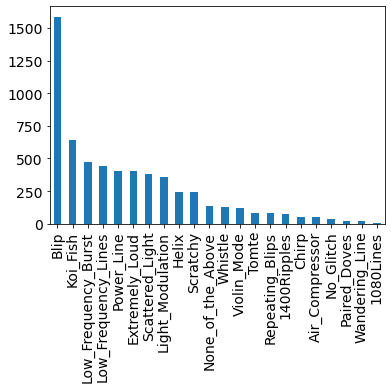

In [14]:
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
df_trn_labels["glitch label"].value_counts().plot(kind="bar")
plt.savefig("glitch distribution.png", bbox_inches='tight', facecolor='w')

In [15]:
df_trn_labels["glitch label"].count

<bound method Series.count of 0                      Blip
1            Extremely_Loud
2               Violin_Mode
3                      Blip
4                  Scratchy
               ...         
5995            1400Ripples
5996    Low_Frequency_Burst
5997        Scattered_Light
5998                   Blip
5999    Low_Frequency_Burst
Name: glitch label, Length: 6000, dtype: object>

In [16]:
df_train.head()

,id,GPStime,centralFreq,peakFreq,snr,ifo,bandwidth,duration
0,HH9ABflByx,1.129517e+09,364.822,225.349,35.919,L1,665.643311,0.250
1,oTXUV2ynKq,1.135647e+09,3609.954,38.027,2743.555,H1,7209.994629,13.690
2,jQwe6arh9F,1.129802e+09,1838.466,2025.310,16.698,H1,3612.932861,0.375
3,g8bOTBroX2,1.131774e+09,2067.878,111.128,12.727,H1,4067.436523,0.105
4,7KAvyGygKM,1.130969e+09,3978.111,131.921,10.926,L1,7795.106934,2.304


#### Feature selection
Since not all the features might not be necessary for training our model, we explore peakFreq, snr, centralFreq , bandwith

In [21]:
dfx= df_train[["GPStime" , "centralFreq" , "peakFreq" , "snr" , "bandwidth" , "duration"]]
df_feature1 = dfx.values
#df_feature1 = df_train.values
df_feature2 = df_trn_labels.values
array1 = df_feature1[:,:]
array2 = df_feature2[:,:]
#X = array[:,0:8]
#Y = array[:,8]

In [17]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# Feature extraction
#test = SelectKBest(score_func=chi2, k=4)
#fit = test.fit(array1, array2)

# Summarize scores
#np.set_printoptions(precision=3)
#print(fit.scores_)

#features = fit.transform(X)
# Summarize selected features
#print(features[0:5,:])

In [23]:
df_trn_labels.head()

,did,glitch label
0,d1,Blip
1,d2,Extremely_Loud
2,d3,Violin_Mode
3,d4,Blip
4,d5,Scratchy


In [ ]:
#--- kNN ---
#from sklearn.feature_selection import mutual_info_classif
#import matplotlib.pyplot as plt
#---%matplotlib inline

#importances = mutual_info_classif(array1,array2)
#importances = mutual_info_classif(df_train,df_trn_labels)
#feat_importances = pd.Series(importances, df_train[0: len(df_train.columns)-1])
#feat_importances.plot(kind='barh', color = 'teal')
#plt.show 

In [138]:
#selecting useful columns in the test set:
X = df_train[["peakFreq","snr","centralFreq","duration", "bandwidth"]]

Y = df_trn_labels['glitch label'].astype('category')

#Split the train data further into train and test sets
# Split training and test sets
validation_size = 0.20
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, stratify = Y)
X_train.head()

,peakFreq,snr,centralFreq,duration,bandwidth
2761,276.750,2514.396,1916.919,4.875,3769.838623
2713,38.027,43.618,124.951,1.500,220.930054
1026,34.154,54.269,1367.522,5.500,2671.043701
5955,512.608,51.195,1891.203,1.250,3718.406250
2338,59.089,14.012,530.023,0.750,981.448242


In [30]:
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 1.607968
Feature 1: 0.659769
Feature 2: 0.965755
Feature 3: 0.871231
Feature 4: 0.924647


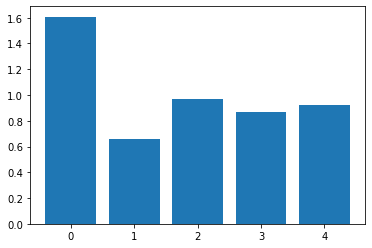

In [31]:
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [32]:
select_features(X_train, Y_train, X_test)

(array([[8.06840000e+01, 8.37900000e+00, 1.96272000e+03, 3.11700000e+00,
         3.82533643e+03],
        [2.11477000e+02, 2.12110000e+01, 3.60325000e+02, 2.81000000e-01,
         6.55277222e+02],
        [1.13190000e+01, 1.42740000e+01, 2.41147900e+03, 2.50000000e+00,
         4.81067236e+03],
        ...,
        [5.97080000e+01, 1.62020000e+01, 8.30200000e+01, 8.75000000e-01,
         8.13760070e+01],
        [3.24754000e+02, 1.67670000e+01, 5.54465000e+02, 1.09000000e-01,
         1.00401343e+03],
        [2.62065000e+02, 1.23380000e+01, 2.45164000e+02, 2.50000000e-01,
         4.05663574e+02]]),
 array([[1.30130000e+01, 1.92520000e+01, 3.97904700e+03, 2.75200000e+00,
         7.94287061e+03],
        [9.90670000e+01, 7.59700000e+00, 1.26570000e+03, 6.60000000e-01,
         2.39354736e+03],
        [5.83960000e+01, 1.89849000e+02, 1.53108000e+02, 3.00000000e+00,
         2.77244598e+02],
        ...,
        [2.96360000e+01, 1.98910000e+01, 3.97995800e+03, 6.64900000e+00,
        

In [33]:
Y_train.head()

4164               Scratchy
1517                   Blip
1077    Low_Frequency_Burst
2680      None_of_the_Above
3256         Extremely_Loud
Name: glitch label, dtype: category
Categories (22, object): [1080Lines, 1400Ripples, Air_Compressor, Blip, ..., Tomte, Violin_Mode, Wandering_Line, Whistle]

In [34]:
X.isna()

,peakFreq,snr,centralFreq,duration,bandwidth
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
5995,False,False,False,False,False
5996,False,False,False,False,False
5997,False,False,False,False,False
5998,False,False,False,False,False


In [36]:
Y.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
5995    False
5996    False
5997    False
5998    False
5999    False
Name: glitch label, Length: 6000, dtype: bool

In [150]:
# Training routine
def train_model(model, **params):

    clf = model(**params)
    clf.fit(X_train,Y_train)
    predictions = clf.predict(X_test)
    acc_train, acc_test = accuracy_score(Y_train, clf.predict(X_train)), accuracy_score(Y_test, predictions)
    print("Train accuracy: {:.2f}, Test accuracy: {:.2f}".format(acc_train, acc_test))
    print(confusion_matrix(Y_test, predictions))
    print(classification_report(Y_test, predictions))
    #report2.to_csv('Classification report.csv', index= True, header = False)
    #to_csv("19244_test data labels.csv", index = False, header = False)
    return acc_test

In [41]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\DRA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [42]:
print(grid_search.best_params_)

{'n_neighbors': 1}


In [43]:
#--- kNN ---#

KNN_array = range(1,6,2)

for n_neighbors in KNN_array:
    print("kNN", n_neighbors)
    train_model(KNeighborsClassifier, n_neighbors=n_neighbors)

kNN 1
Train accuracy: 1.00, Test accuracy: 0.66
kNN 3
Train accuracy: 0.81, Test accuracy: 0.66
kNN 5
Train accuracy: 0.77, Test accuracy: 0.66


In [51]:
train_model(KNeighborsClassifier, n_neighbors=1)

Train accuracy: 1.00, Test accuracy: 0.66
[[  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   2]
 [  0   0   5   0   0   0   0   0   0   0   0   1   1   0   1   0   1   0
    1   0   0   0]
 [  0   0   1 247   6   1   3  12  21   0   1   1   0   0   1  11   2   8
    2   0   0   0]
 [  0   0   0   4   7   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   1   0  59   1  12   3   2   0   0   1   0   0   0   1   0
    1   0   0   0]
 [  0   0   0   5   0   0  42   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0]
 [  0   0   0  13   0   7   0  85  12   4   1   0   0   0   0   2   2   0
    1   0   0   0]
 [  0   0   0  19   0   2   1   6  26   7   1   0   2   3   2   0   3   0
    0   0   0   0]
 [  0   0   0   0   0   1   0   0   9  53  23   0   5   0   1   0   3   0
    0   0   0   0]
 [  0   0   0   0   0   0   

C:\Users\DRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6558333333333334

In [52]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\DRA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.270 total time=   4.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.270 total time=   4.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.266 total time=   4.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.268 total time=   4.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.270 total time=   3.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.294 total time=   4.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.300 total time=   3.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.295 total time=   4.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.302 total time=   3.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.300 total time=   4.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.343 total time=   3.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.346 total time=   3.6s
[CV 3/5] END .....C=0.1, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [53]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.0001)


In [56]:
#Using the optimal parameters obtained after running GridSearch CV
#We invoke the training routing made above to call the SVC with these parameters
train_model(SVC, gamma=0.0001, C=100)

Train accuracy: 0.92, Test accuracy: 0.69
[[  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0  12   0   0   0   3   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   4   2   0   0   0   0   0   0   0   0   2   0   2   0   0   0
    0   0   0   0]
 [  0   0   1 271   2   0   4  11   9   0   0   3   0   0   5   2   2   5
    2   0   0   0]
 [  0   0   0  11   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0  65   1  10   2   0   0   0   1   0   0   0   1   0
    1   0   0   0]
 [  0   0   0   5   0   0  42   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0]
 [  0   0   1  12   0  12   0  86  10   2   0   0   1   1   0   0   1   0
    1   0   0   0]
 [  0   0   0  21   0   3   0   3  24   9   2   0   2   2   1   1   3   0
    1   0   0   0]
 [  0   0   0   2   0   0   0   0   4  67  15   0   2   0   1   0   3   0
    1   0   0   0]
 [  0   0   0   0   0   0   

C:\Users\DRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6858333333333333

In [27]:
# Manually tuned --- SVM without GridSearchCV ---#

SVM_array = [1e-6,1e-5]
c_array = [1e3,1e4]

for gamma in SVM_array:
    for c in c_array:
        print("SVM", gamma, c)
        train_model(SVC, gamma=gamma, C=c)

SVM 1e-06 1000.0
Train accuracy: 0.80, Test accuracy: 0.76
                     precision    recall  f1-score   support

          1080Lines       0.00      0.00      0.00         1
        1400Ripples       0.80      0.80      0.80        15
     Air_Compressor       0.54      0.70      0.61        10
               Blip       0.82      0.92      0.87       317
              Chirp       0.00      0.00      0.00        11
     Extremely_Loud       0.84      0.75      0.79        81
              Helix       0.83      0.78      0.80        49
           Koi_Fish       0.85      0.87      0.86       127
   Light_Modulation       0.60      0.53      0.56        72
Low_Frequency_Burst       0.55      0.61      0.58        95
Low_Frequency_Lines       0.53      0.56      0.55        89
          No_Glitch       0.00      0.00      0.00         7
  None_of_the_Above       0.50      0.19      0.27        27
       Paired_Doves       0.00      0.00      0.00         5
         Power_Line      

C:\Users\DRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train accuracy: 0.85, Test accuracy: 0.77
                     precision    recall  f1-score   support

          1080Lines       0.00      0.00      0.00         1
        1400Ripples       0.75      0.80      0.77        15
     Air_Compressor       0.56      0.90      0.69        10
               Blip       0.82      0.90      0.86       317
              Chirp       0.00      0.00      0.00        11
     Extremely_Loud       0.84      0.78      0.81        81
              Helix       0.81      0.71      0.76        49
           Koi_Fish       0.85      0.87      0.86       127
   Light_Modulation       0.61      0.53      0.57        72
Low_Frequency_Burst       0.65      0.71      0.68        95
Low_Frequency_Lines       0.64      0.69      0.66        89
          No_Glitch       0.00      0.00      0.00         7
  None_of_the_Above       0.58      0.26      0.36        27
       Paired_Doves       0.50      0.20      0.29         5
         Power_Line       0.92      0.99  

C:\Users\DRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train accuracy: 0.89, Test accuracy: 0.73
                     precision    recall  f1-score   support

          1080Lines       0.00      0.00      0.00         1
        1400Ripples       0.91      0.67      0.77        15
     Air_Compressor       0.78      0.70      0.74        10
               Blip       0.80      0.87      0.83       317
              Chirp       0.00      0.00      0.00        11
     Extremely_Loud       0.73      0.74      0.74        81
              Helix       0.77      0.76      0.76        49
           Koi_Fish       0.80      0.80      0.80       127
   Light_Modulation       0.54      0.35      0.42        72
Low_Frequency_Burst       0.58      0.68      0.62        95
Low_Frequency_Lines       0.60      0.63      0.62        89
          No_Glitch       0.00      0.00      0.00         7
  None_of_the_Above       0.47      0.30      0.36        27
       Paired_Doves       0.50      0.20      0.29         5
         Power_Line       0.88      0.98  

C:\Users\DRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train accuracy: 0.93, Test accuracy: 0.74
                     precision    recall  f1-score   support

          1080Lines       0.00      0.00      0.00         1
        1400Ripples       0.91      0.67      0.77        15
     Air_Compressor       0.64      0.70      0.67        10
               Blip       0.81      0.88      0.84       317
              Chirp       0.33      0.09      0.14        11
     Extremely_Loud       0.73      0.74      0.74        81
              Helix       0.77      0.76      0.76        49
           Koi_Fish       0.81      0.79      0.80       127
   Light_Modulation       0.49      0.40      0.44        72
Low_Frequency_Burst       0.66      0.74      0.70        95
Low_Frequency_Lines       0.66      0.65      0.66        89
          No_Glitch       0.12      0.14      0.13         7
  None_of_the_Above       0.47      0.33      0.39        27
       Paired_Doves       0.33      0.40      0.36         5
         Power_Line       0.86      0.98  

C:\Users\DRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
import warnings

warnings.filterwarnings('ignore')

In [58]:
#--- Decision Tree ---#

print("Decision Tree")
train_model(DecisionTreeClassifier)

Decision Tree
Train accuracy: 1.00, Test accuracy: 0.79
[[  0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0  14   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   1]
 [  0   0   9   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0 258   8   0   1   5  23   0   0   1   0   0   0  13   0   2
    6   0   0   0]
 [  0   0   0   2   9   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0  68   2   5   2   2   0   0   2   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   2   0   2  45   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   2   0   9   0 105   4   2   0   0   0   0   0   3   1   0
    1   0   0   0]
 [  0   0   0  12   3   4   0   3  31   9   2   2   1   0   0   3   1   1
    0   0   0   0]
 [  0   0   1   2   0   0   0   0   6  73  11   0   2   0   0   0   0   0
    0   0   0   0]
 [  0   0   0 

0.7916666666666666

In [151]:
# Training routine
def train_model(model, **params):

    clf = model(**params)
    clf.fit(X_train,Y_train)
    predictions = clf.predict(X_test)
    acc_train, acc_test = accuracy_score(Y_train, clf.predict(X_train)), accuracy_score(Y_test, predictions)
    print("Train accuracy: {:.2f}, Test accuracy: {:.2f}".format(acc_train, acc_test))
    print(confusion_matrix(Y_test, predictions))
    #print(classification_report(Y_test, predictions))
    #report2.to_csv('Classification report.csv', index= True, header = False)
    #to_csv("19244_test data labels.csv", index = False, header = False)
    return acc_test

train_model(DecisionTreeClassifier)

Train accuracy: 1.00, Test accuracy: 0.79
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   1]
 [  0  15   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   9   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   1 270   6   0   0   5  18   0   0   0   0   0   0  13   0   2
    2   0   0   0]
 [  0   0   0   3   6   0   0   0   0   1   0   0   0   0   0   1   0   0
    0   0   0   0]
 [  0   0   0   0   1  66   1   8   1   3   0   0   0   0   0   0   1   0
    0   0   0   0]
 [  0   0   0   0   0   0  48   0   0   0   0   0   0   0   0   0   0   1
    0   0   0   0]
 [  0   0   0   6   0  10   0 102   4   0   0   0   1   0   0   4   0   0
    0   0   0   0]
 [  0   0   0  21   3   4   0   1  27   9   3   1   1   0   0   0   1   0
    0   0   1   0]
 [  0   0   0   1   0   1   0   1   6  76   9   0   0   0   0   0   1   0
    0   0   0   0]
 [  0   0   0   0   0   0   

0.7941666666666667

In [139]:
rfc = RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [61]:
print(clf.best_params_)

{'max_depth': 14, 'max_features': 3}


In [136]:
train_model(RandomForestClassifier, max_depth = 14, max_features = 3)

Train accuracy: 0.99, Test accuracy: 0.87
                     precision    recall  f1-score   support

          1080Lines       0.00      0.00      0.00         1
        1400Ripples       0.00      0.00      0.00        15
     Air_Compressor       0.00      0.00      0.00        10
               Blip       0.25      0.28      0.26       317
              Chirp       0.00      0.00      0.00        11
     Extremely_Loud       0.07      0.07      0.07        81
              Helix       0.02      0.02      0.02        49
           Koi_Fish       0.16      0.17      0.16       127
   Light_Modulation       0.04      0.03      0.03        72
Low_Frequency_Burst       0.03      0.03      0.03        95
Low_Frequency_Lines       0.12      0.11      0.11        89
          No_Glitch       0.00      0.00      0.00         7
  None_of_the_Above       0.06      0.04      0.04        27
       Paired_Doves       0.00      0.00      0.00         5
         Power_Line       0.05      0.05  

In [66]:
metadata_df= pd.concat([df_train, df_trn_labels] , axis=1 , join = 'outer')

In [140]:
# Use the best model to plot the results in 2D

labelx, labely = "centralFreq", "peakFreq"
#labelx, labely = "bandwidth", "peakFreq"
X = df_train[[labelx, labely]]

# Read categories and turn them into digits
Y = metadata_df['glitch label'].astype('category')
Ydigits = pd.factorize(Y)[0]

# Make a grid in the parameter space
h = 10
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Choose the model
clf = DecisionTreeClassifier()
#clf = svm.SVC(gamma=1.e-5, C=1.e3)
#clf = KNeighborsClassifier(6)

# Fit, predict and reshape
clf.fit(X.values, Ydigits)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

We now use the best model above to predict class labels on the given test set

In [141]:
X_hat_test = df_test[["peakFreq","centralFreq"]]

pred_results = clf.predict(X_hat_test)
pred_results

array([ 2, 19,  5,  9, 19,  2,  5,  5,  3,  2,  2,  2,  5,  3,  3,  9, 12,
        9,  5,  2,  3, 12,  2,  9,  5,  3,  5,  2, 19, 12, 12,  5,  5,  2,
        6, 19,  9,  5,  2,  5,  3,  8,  5,  2,  5, 19,  8,  8,  5,  5,  8,
        5,  2,  2,  5, 20,  2,  8, 12,  2,  2,  2, 19,  0,  2,  5,  2,  2,
        2,  2,  5,  2,  3,  9,  3, 19,  6, 19,  2,  5,  5,  9, 19,  8,  2,
        2,  2,  2,  3,  8, 19, 14, 19,  5,  5, 19,  9,  2,  1,  9,  2,  5,
       19,  9, 19,  3,  7,  2,  1,  5,  2,  5,  9,  3,  5,  2,  5,  5,  5,
       12,  8,  5,  5,  9, 19,  2, 19,  3,  9,  2,  5,  2,  2,  3, 19,  5,
        3,  3, 19, 11,  5,  2, 12, 12, 19,  3,  2,  2,  8,  5, 19, 19, 19,
        2,  2,  2,  8,  0,  2, 14,  9, 12,  3,  5,  3,  2,  5,  2,  2,  2,
        2,  9,  3,  9,  9,  2,  3,  2,  9,  9, 13, 19, 19,  2,  9,  5,  2,
        3, 11,  5,  2,  2,  6, 12,  2,  2,  2,  5,  8,  2,  5,  2, 19,  2,
        3,  9,  3,  2,  3,  3, 13,  2,  9,  0,  0,  2,  2,  2, 19, 12,  9,
        2,  0,  8,  2, 12

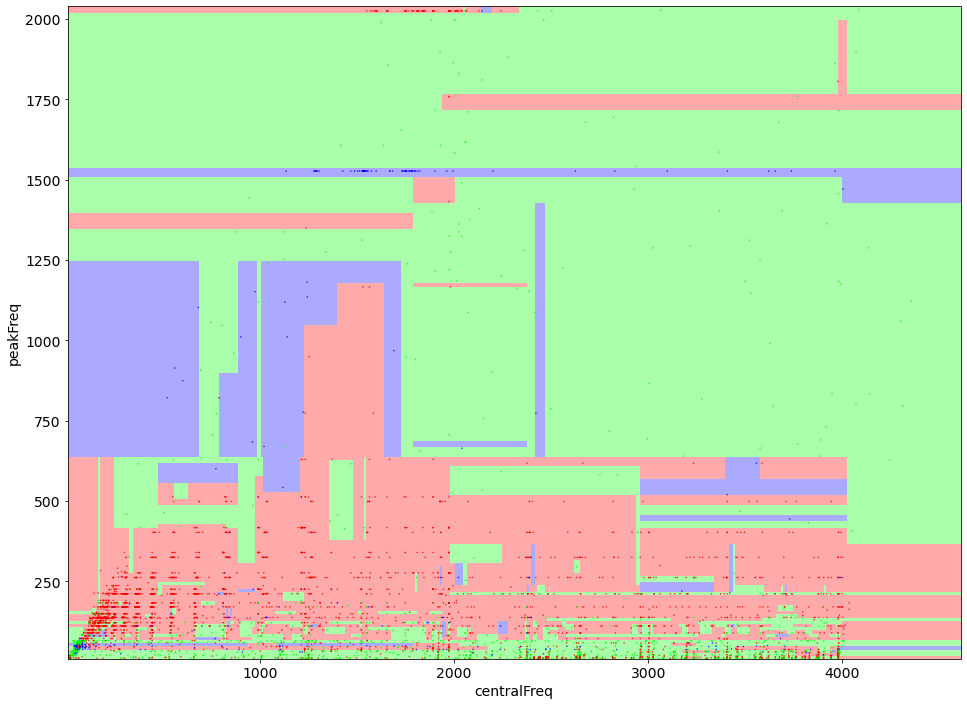

In [143]:
# Plot
plt.figure(figsize=(16,12))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Show predicted regions
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
# Show also training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Ydigits, cmap=cmap_bold, s=0.2)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(labelx)
plt.ylabel(labely)
plt.savefig("Decision tree tuned plot.png")
plt.show()

In [32]:
metadata_df.head()

,id,GPStime,centralFreq,peakFreq,snr,ifo,bandwidth,duration,did,glitch label
0,HH9ABflByx,1.129517e+09,364.822,225.349,35.919,L1,665.643311,0.250,d1,Blip
1,oTXUV2ynKq,1.135647e+09,3609.954,38.027,2743.555,H1,7209.994629,13.690,d2,Extremely_Loud
2,jQwe6arh9F,1.129802e+09,1838.466,2025.310,16.698,H1,3612.932861,0.375,d3,Violin_Mode
3,g8bOTBroX2,1.131774e+09,2067.878,111.128,12.727,H1,4067.436523,0.105,d4,Blip
4,7KAvyGygKM,1.130969e+09,3978.111,131.921,10.926,L1,7795.106934,2.304,d5,Scratchy


In [ ]:
import csv,sys
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from scipy import sparse

### After one hot encoding
Despite the decent accuracy and F1 score obtained in the above model without taking into consideration the 
Tracking the correlation of the detector's location with glitch classification
Research Question : Does the location of the interferometer have a sizeable impact on the classsification and identification of Gravitational Waves ?

 the LIGO Livingston Observatory is situated at ( 30°33′46.42″N 90°46′27.27″W) in Livingston, Louisiana, and the LIGO Hanford Observatory, on the DOE Hanford Site ( 46°27′18.52″N 119°24′27.56″W), located near Richland, Washington.

In [77]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(metadata_df[['ifo']]).toarray())

#merge one-hot encoded columns back with original DataFrame
merged_df = metadata_df.join(encoder_df)

#view final df
print(merged_df.head)




<bound method NDFrame.head of               id       GPStime  centralFreq  peakFreq       snr ifo  \
0     HH9ABflByx  1.129517e+09      364.822   225.349    35.919  L1   
1     oTXUV2ynKq  1.135647e+09     3609.954    38.027  2743.555  H1   
2     jQwe6arh9F  1.129802e+09     1838.466  2025.310    16.698  H1   
3     g8bOTBroX2  1.131774e+09     2067.878   111.128    12.727  H1   
4     7KAvyGygKM  1.130969e+09     3978.111   131.921    10.926  L1   
...          ...           ...          ...       ...       ...  ..   
5995  RWYExXLh6F  1.137220e+09     1751.744  1527.022    13.545  L1   
5996  xjlVdOZ87t  1.135179e+09     2434.358    10.501    12.226  L1   
5997  2V6OC7CgyC  1.133291e+09     2081.403    32.397    15.342  H1   
5998  l1R7g8dkeQ  1.132813e+09      458.770   402.439     9.298  H1   
5999  uggoFEsuzY  1.136632e+09     2959.899    13.768    15.037  H1   

        bandwidth  duration    did         glitch label    0    1  
0      665.643311     0.250     d1               

In [78]:
merged_df.head()

,id,GPStime,centralFreq,peakFreq,snr,ifo,bandwidth,duration,did,glitch label,0,1
0,HH9ABflByx,1.129517e+09,364.822,225.349,35.919,L1,665.643311,0.250,d1,Blip,0.0,1.0
1,oTXUV2ynKq,1.135647e+09,3609.954,38.027,2743.555,H1,7209.994629,13.690,d2,Extremely_Loud,1.0,0.0
2,jQwe6arh9F,1.129802e+09,1838.466,2025.310,16.698,H1,3612.932861,0.375,d3,Violin_Mode,1.0,0.0
3,g8bOTBroX2,1.131774e+09,2067.878,111.128,12.727,H1,4067.436523,0.105,d4,Blip,1.0,0.0
4,7KAvyGygKM,1.130969e+09,3978.111,131.921,10.926,L1,7795.106934,2.304,d5,Scratchy,0.0,1.0


In [79]:
 merged_df.rename(columns= {0: "Hanford" , 1:"Livingston"}, inplace=True)

In [86]:
merged_df.head()

,id,GPStime,centralFreq,peakFreq,snr,ifo,bandwidth,duration,did,glitch label,Hanford,Livingston
0,HH9ABflByx,1.129517e+09,364.822,225.349,35.919,L1,665.643311,0.250,d1,Blip,0.0,1.0
1,oTXUV2ynKq,1.135647e+09,3609.954,38.027,2743.555,H1,7209.994629,13.690,d2,Extremely_Loud,1.0,0.0
2,jQwe6arh9F,1.129802e+09,1838.466,2025.310,16.698,H1,3612.932861,0.375,d3,Violin_Mode,1.0,0.0
3,g8bOTBroX2,1.131774e+09,2067.878,111.128,12.727,H1,4067.436523,0.105,d4,Blip,1.0,0.0
4,7KAvyGygKM,1.130969e+09,3978.111,131.921,10.926,L1,7795.106934,2.304,d5,Scratchy,0.0,1.0


We first train the model with those glitches with data from Hanford, plot the results of the model and then do the same with Livingston. We compare the accuracy metrics of both these models

In [88]:
#selecting useful columns in the test set:
X_new = merged_df[["peakFreq","snr","centralFreq","duration", "bandwidth", "Hanford"]]
Y_new = merged_df['glitch label'].astype('category')

#Split the train data further into train and test sets
# Split training and test sets
validation_size = 0.20
X_train_new, X_test_new, Y_train_new, Y_test_new = model_selection.train_test_split(X_new, Y_new, test_size=validation_size, stratify = Y)
X_train_new.head()

,peakFreq,snr,centralFreq,duration,bandwidth,Hanford
1425,498.708,12.869,851.464,0.031,1541.812866,0.0
1555,11.319,15.948,967.767,1.500,1923.248779,0.0
4002,211.477,15.229,303.810,0.078,502.703705,1.0
1358,128.890,7.721,127.489,1.250,124.965027,0.0
4432,80.667,161.679,444.386,1.500,824.772766,1.0


In [89]:
# Training routine
def train_model(model, **params):

    clf = model(**params)
    clf.fit(X_train_new,Y_train_new)
    predictions2 = clf.predict(X_test_new)
    acc_train, acc_test = accuracy_score(Y_train_new, clf.predict(X_train_new)), accuracy_score(Y_test_new, predictions2)
    print("Train accuracy: {:.2f}, Test accuracy: {:.2f}".format(acc_train, acc_test))
    #print(confusion_matrix(Y_test, predictions))
    #print(classification_report(Y_test_new, predictions))
    return acc_test

In [90]:
#--- kNN ---#

KNN_array = range(2,6,2)

for n_neighbors in KNN_array:
    print("kNN", n_neighbors)
    train_model(KNeighborsClassifier, n_neighbors=n_neighbors)


#--- SVM ---#

SVM_array = [1e-4,1e-3]
c_array = [1e3,1e4]

for gamma in SVM_array:
    for c in c_array:
        print("SVM", gamma, c)
        train_model(SVC, gamma=gamma, C=c)

#--- Decision Tree ---#

print("Decision Tree")
train_model(DecisionTreeClassifier)


#--- Random Forest ---#

n_ests = [50, 150]

for n_estimators in n_ests:
    print("Random Forest", n_estimators)
    train_model(RandomForestClassifier, n_estimators=n_estimators)

kNN 2
Train accuracy: 0.83, Test accuracy: 0.64
kNN 4
Train accuracy: 0.78, Test accuracy: 0.66
SVM 0.0001 1000.0
Train accuracy: 0.96, Test accuracy: 0.69
SVM 0.0001 10000.0
Train accuracy: 0.98, Test accuracy: 0.68
SVM 0.001 1000.0
Train accuracy: 0.99, Test accuracy: 0.59
SVM 0.001 10000.0
Train accuracy: 0.99, Test accuracy: 0.59
Decision Tree
Train accuracy: 1.00, Test accuracy: 0.80
Random Forest 50
Train accuracy: 1.00, Test accuracy: 0.87
Random Forest 150
Train accuracy: 1.00, Test accuracy: 0.87


In [94]:
def train_model(model, **params):

    clf = model(**params)
    clf.fit(X_train_new,Y_train_new)
    predictions2 = clf.predict(X_test_new)
    acc_train, acc_test = accuracy_score(Y_train_new, clf.predict(X_train_new)), accuracy_score(Y_test_new, predictions2)
    print("Train accuracy: {:.2f}, Test accuracy: {:.2f}".format(acc_train, acc_test))
    #print(confusion_matrix(Y_test, predictions))
    print(classification_report(Y_test_new, predictions2))
    return acc_test
train_model(RandomForestClassifier, n_estimators=n_estimators)

Train accuracy: 1.00, Test accuracy: 0.87
                     precision    recall  f1-score   support

          1080Lines       0.00      0.00      0.00         1
        1400Ripples       1.00      0.93      0.97        15
     Air_Compressor       1.00      1.00      1.00        10
               Blip       0.85      0.95      0.90       317
              Chirp       1.00      0.55      0.71        11
     Extremely_Loud       0.87      0.85      0.86        81
              Helix       0.96      0.92      0.94        49
           Koi_Fish       0.86      0.89      0.88       127
   Light_Modulation       0.71      0.61      0.66        72
Low_Frequency_Burst       0.82      0.82      0.82        95
Low_Frequency_Lines       0.88      0.87      0.87        89
          No_Glitch       0.83      0.71      0.77         7
  None_of_the_Above       1.00      0.41      0.58        27
       Paired_Doves       1.00      1.00      1.00         5
         Power_Line       0.98      1.00  

0.8658333333333333

The train and test accuracies of the Random Forest classifier seem the best out of those tried and tested, so we use it to plot results and make predictions

In [91]:
# Use the best model to plot the results in 2D

labelx, labely = "centralFreq", "peakFreq"
#labelx, labely = "bandwidth", "peakFreq"
X = merged_df[[labelx, labely]]

# Read categories and turn them into digits
Y = merged_df['glitch label'].astype('category')
Ydigits = pd.factorize(Y)[0]

# Make a grid in the parameter space
h = 10
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Choose the model
clf2 = RandomForestClassifier()
#clf = svm.SVC(gamma=1.e-5, C=1.e3)
#clf = KNeighborsClassifier(6)

# Fit, predict and reshape
clf2.fit(X.values, Ydigits)
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

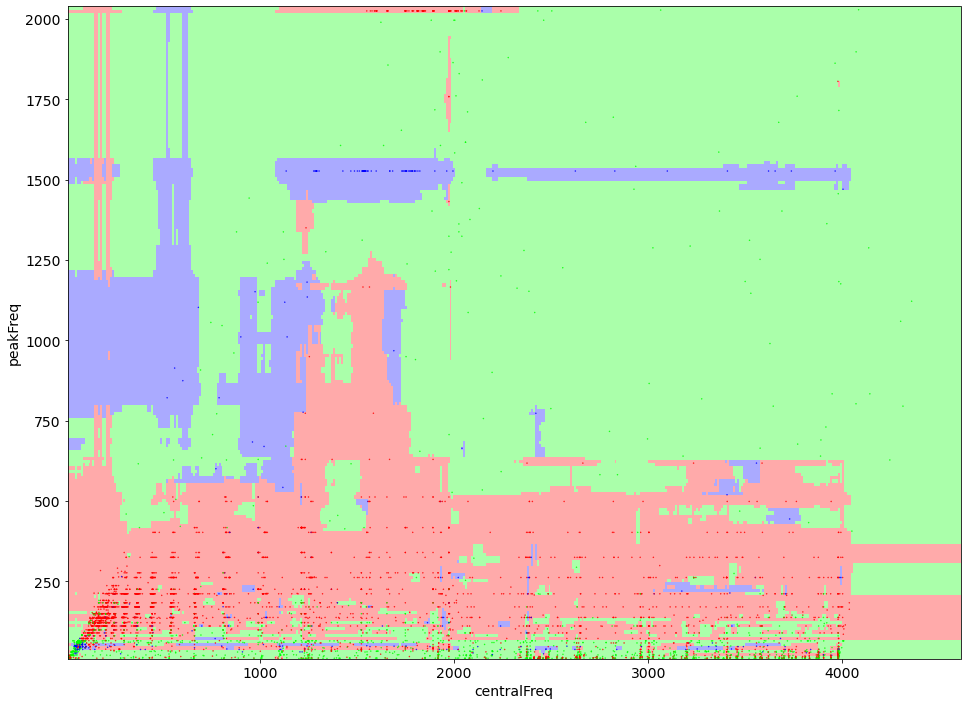

In [92]:
# Plot
plt.figure(figsize=(16,12))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Show predicted regions
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
# Show also training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Ydigits, cmap=cmap_bold, s=0.2)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(labelx)
plt.ylabel(labely)
plt.savefig("regions_Hanford2.png")
plt.show()

In [70]:
clf.fit(X_new, Y_new)

RandomForestClassifier()

In [71]:
df_test.head()

,id,GPStime,centralFreq,peakFreq,snr,ifo,bandwidth,duration
0,YVnrMXRcUP,1.132261e+09,2960.810,38.027,63.400,H1,5902.753418,2.000
1,qD8uxo1Jeu,1.132725e+09,1119.993,324.754,11.789,H1,2135.070557,0.070
2,Z5grpD4TOG,1.128422e+09,236.863,134.965,8.000,L1,211.306503,0.047
3,4TskgvMLa2,1.132886e+09,1905.332,137.711,14.362,H1,3742.343506,0.125
4,ZMEZmAs4gO,1.132755e+09,1119.433,170.654,9.087,H1,2174.645996,0.230


In [96]:

encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df_test[['ifo']]).toarray())

#merge one-hot encoded columns back with original DataFrame
test_data = df_test.join(encoder_df)

#view final df
print(test_data.head)

<bound method NDFrame.head of              id       GPStime  centralFreq  peakFreq     snr ifo    bandwidth  \
0    YVnrMXRcUP  1.132261e+09     2960.810    38.027  63.400  H1  5902.753418   
1    qD8uxo1Jeu  1.132725e+09     1119.993   324.754  11.789  H1  2135.070557   
2    Z5grpD4TOG  1.128422e+09      236.863   134.965   8.000  L1   211.306503   
3    4TskgvMLa2  1.132886e+09     1905.332   137.711  14.362  H1  3742.343506   
4    ZMEZmAs4gO  1.132755e+09     1119.433   170.654   9.087  H1  2174.645996   
..          ...           ...          ...       ...     ...  ..          ...   
662  UWwq1ojfrU  1.131064e+09     3698.458    89.676  83.563  H1  7387.001465   
663  OPltjycZFB  1.128389e+09      158.524   134.965   7.943  L1    69.029388   
664  LFtvutSUqH  1.134483e+09     1853.202    20.755  11.217  H1  3677.432861   
665  cQl1WTd8Sb  1.129802e+09     1818.097  2025.310  17.042  H1  3539.667725   
666  aBkbkUaEIg  1.132601e+09     2845.455    89.676  19.070  H1  5622.589355  

In [97]:
test_data.rename(columns= {0: "Hanford" , 1:"Livingston"}, inplace=True)

In [98]:
test_data.head()

,id,GPStime,centralFreq,peakFreq,snr,ifo,bandwidth,duration,Hanford,Livingston
0,YVnrMXRcUP,1.132261e+09,2960.810,38.027,63.400,H1,5902.753418,2.000,1.0,0.0
1,qD8uxo1Jeu,1.132725e+09,1119.993,324.754,11.789,H1,2135.070557,0.070,1.0,0.0
2,Z5grpD4TOG,1.128422e+09,236.863,134.965,8.000,L1,211.306503,0.047,0.0,1.0
3,4TskgvMLa2,1.132886e+09,1905.332,137.711,14.362,H1,3742.343506,0.125,1.0,0.0
4,ZMEZmAs4gO,1.132755e+09,1119.433,170.654,9.087,H1,2174.645996,0.230,1.0,0.0


With respect to those interferometers located at Livingston

In [100]:
#selecting useful columns in the test set:
X_new3 = merged_df[["peakFreq","snr","centralFreq","duration", "bandwidth", "Livingston"]]
Y_new3 = merged_df['glitch label'].astype('category')

#Split the train data further into train and test sets
# Split training and test sets
validation_size = 0.20
X_train_new3, X_test_new3, Y_train_new3, Y_test_new3 = model_selection.train_test_split(X_new3, Y_new3, test_size=validation_size, stratify = Y)
X_train_new3.head()

,peakFreq,snr,centralFreq,duration,bandwidth,Livingston
1068,21.507,16.219,1267.841,2.143,2512.303711,0.0
3406,149.414,11.343,154.501,0.125,190.459290,0.0
3198,11.319,21.100,2092.190,3.250,4169.156250,0.0
2009,30.711,25.480,51.401,2.500,58.312511,0.0
3893,211.477,13.429,298.747,0.250,512.830017,0.0


In [101]:
# Training routine
def train_model(model, **params):

    clf = model(**params)
    clf.fit(X_train_new3,Y_train_new3)
    predictions3 = clf.predict(X_test_new3)
    acc_train, acc_test = accuracy_score(Y_train_new3, clf.predict(X_train_new3)), accuracy_score(Y_test_new3, predictions3)
    print("Train accuracy: {:.2f}, Test accuracy: {:.2f}".format(acc_train, acc_test))
    #print(confusion_matrix(Y_test_new3, predictions3))
    #print(classification_report(Y_test_new, predictions))
    return acc_test

In [102]:
#--- kNN ---#

KNN_array = range(2,6,2)

for n_neighbors in KNN_array:
    print("kNN", n_neighbors)
    train_model(KNeighborsClassifier, n_neighbors=n_neighbors)


#--- SVM ---#

SVM_array = [1e-4,1e-3]
c_array = [1e3,1e4]

for gamma in SVM_array:
    for c in c_array:
        print("SVM", gamma, c)
        train_model(SVC, gamma=gamma, C=c)

#--- Decision Tree ---#

print("Decision Tree")
train_model(DecisionTreeClassifier)


#--- Random Forest ---#

n_ests = [50, 150]

for n_estimators in n_ests:
    print("Random Forest", n_estimators)
    train_model(RandomForestClassifier, n_estimators=n_estimators)

kNN 2
Train accuracy: 0.83, Test accuracy: 0.65
kNN 4
Train accuracy: 0.78, Test accuracy: 0.67
SVM 0.0001 1000.0
Train accuracy: 0.96, Test accuracy: 0.70
SVM 0.0001 10000.0
Train accuracy: 0.98, Test accuracy: 0.69
SVM 0.001 1000.0
Train accuracy: 0.99, Test accuracy: 0.62
SVM 0.001 10000.0
Train accuracy: 0.99, Test accuracy: 0.62
Decision Tree
Train accuracy: 1.00, Test accuracy: 0.81
Random Forest 50
Train accuracy: 1.00, Test accuracy: 0.86
Random Forest 150
Train accuracy: 1.00, Test accuracy: 0.87


In [106]:
# Training routine
def train_model(model, **params):

    clf = model(**params)
    clf.fit(X_train_new3,Y_train_new3)
    predictions3 = clf.predict(X_test_new3)
    acc_train, acc_test = accuracy_score(Y_train_new3, clf.predict(X_train_new3)), accuracy_score(Y_test_new3, predictions3)
    print("Train accuracy: {:.2f}, Test accuracy: {:.2f}".format(acc_train, acc_test))
    #print(confusion_matrix(Y_test_new3, predictions3))
    print(classification_report(Y_test_new, predictions3))
    return acc_test

train_model(RandomForestClassifier, n_estimators=n_estimators)

Train accuracy: 1.00, Test accuracy: 0.87
                     precision    recall  f1-score   support

          1080Lines       0.00      0.00      0.00         1
        1400Ripples       0.14      0.13      0.14        15
     Air_Compressor       0.00      0.00      0.00        10
               Blip       0.27      0.30      0.29       317
              Chirp       0.00      0.00      0.00        11
     Extremely_Loud       0.02      0.02      0.02        81
              Helix       0.00      0.00      0.00        49
           Koi_Fish       0.12      0.13      0.13       127
   Light_Modulation       0.10      0.07      0.08        72
Low_Frequency_Burst       0.12      0.11      0.11        95
Low_Frequency_Lines       0.06      0.07      0.07        89
          No_Glitch       0.00      0.00      0.00         7
  None_of_the_Above       0.00      0.00      0.00        27
       Paired_Doves       0.00      0.00      0.00         5
         Power_Line       0.11      0.11  

0.8708333333333333

In [107]:
# Use the best model to plot the results in 2D

labelx, labely = "centralFreq", "peakFreq"
#labelx, labely = "bandwidth", "peakFreq"
X = merged_df[[labelx, labely]]

# Read categories and turn them into digits
Y = merged_df['glitch label'].astype('category')
Ydigits = pd.factorize(Y)[0]

# Make a grid in the parameter space
h = 10
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Choose the model
clf2 = RandomForestClassifier()
#clf = svm.SVC(gamma=1.e-5, C=1.e3)
#clf = KNeighborsClassifier(6)

# Fit, predict and reshape
clf2.fit(X.values, Ydigits)
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

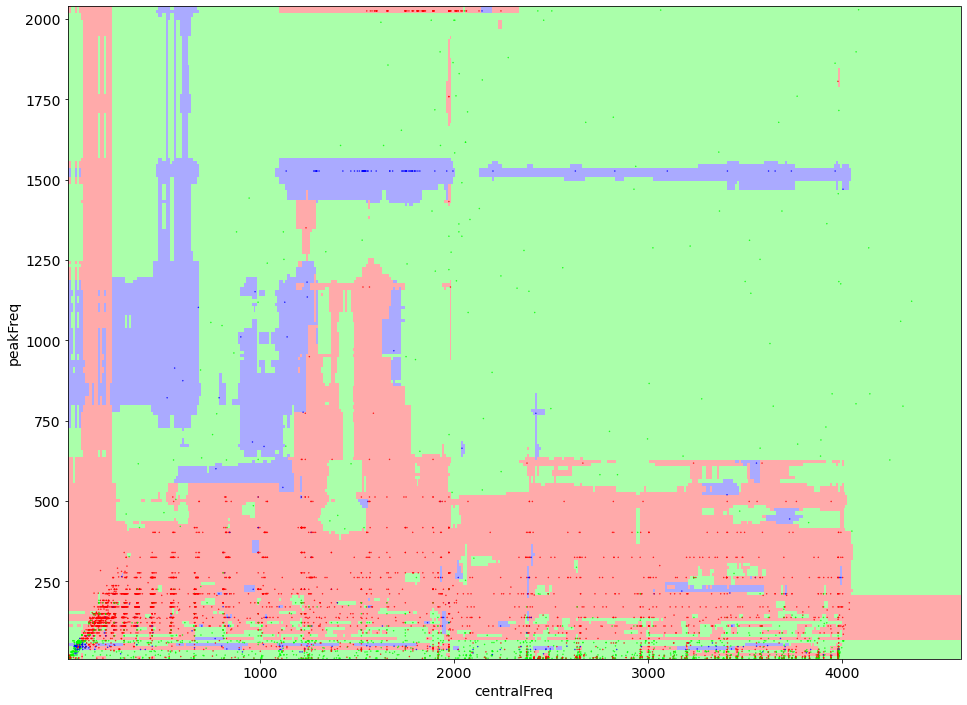

In [108]:
# Plot
plt.figure(figsize=(16,12))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Show predicted regions
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
# Show also training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Ydigits, cmap=cmap_bold, s=0.2)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(labelx)
plt.ylabel(labely)
plt.savefig("regions_Livingston3.png")
plt.show()

# Considering data from both the Stations


In [144]:
#selecting useful columns in the test set:
X_new4 = merged_df[["peakFreq","snr","centralFreq","duration", "bandwidth", "Hanford" , "Livingston"]]
Y_new4 = merged_df['glitch label'].astype('category')

#Split the train data further into train and test sets
# Split training and test sets
validation_size = 0.20
X_train_new4, X_test_new4, Y_train_new4, Y_test_new4 = model_selection.train_test_split(X_new4, Y_new4, test_size=validation_size, stratify = Y)
X_train_new4.head()

,peakFreq,snr,centralFreq,duration,bandwidth,Hanford,Livingston
4643,170.654,30.315,357.765,0.281,660.397888,1.0,0.0
4179,11.139,22.583,3459.514,6.500,6904.616699,0.0,1.0
3709,137.711,24.972,1824.491,0.313,3593.850830,1.0,0.0
2817,72.366,7.864,87.773,0.055,131.055557,1.0,0.0
3696,262.065,23.918,437.389,0.375,830.289307,1.0,0.0


In [148]:
# Training routine
def train_model(model, **params):

    clf = model(**params)
    clf.fit(X_train_new4,Y_train_new4)
    predictions4 = clf.predict(X_test_new4)
    acc_train, acc_test = accuracy_score(Y_train_new4, clf.predict(X_train_new4)), accuracy_score(Y_test_new4, predictions4)
    print("Train accuracy: {:.2f}, Test accuracy: {:.2f}".format(acc_train, acc_test))
    #print(confusion_matrix(Y_test_new3, predictions3))
    print(classification_report(Y_test_new, predictions4))
    return acc_test

In [149]:
#--- kNN ---#

KNN_array = range(2,6,2)

for n_neighbors in KNN_array:
    print("kNN", n_neighbors)
    train_model(KNeighborsClassifier, n_neighbors=n_neighbors)


#--- SVM ---#

SVM_array = [1e-4,1e-3]
c_array = [1e3,1e4]

for gamma in SVM_array:
    for c in c_array:
        print("SVM", gamma, c)
        train_model(SVC, gamma=gamma, C=c)

#--- Decision Tree ---#

print("Decision Tree")
train_model(DecisionTreeClassifier)


#--- Random Forest ---#

n_ests = [50, 150]

for n_estimators in n_ests:
    print("Random Forest", n_estimators)
    train_model(RandomForestClassifier, n_estimators=n_estimators)

kNN 2
Train accuracy: 0.83, Test accuracy: 0.64
                     precision    recall  f1-score   support

          1080Lines       0.00      0.00      0.00         1
        1400Ripples       0.00      0.00      0.00        15
     Air_Compressor       0.00      0.00      0.00        10
               Blip       0.28      0.34      0.31       317
              Chirp       0.00      0.00      0.00        11
     Extremely_Loud       0.03      0.04      0.03        81
              Helix       0.04      0.04      0.04        49
           Koi_Fish       0.11      0.09      0.10       127
   Light_Modulation       0.06      0.06      0.06        72
Low_Frequency_Burst       0.12      0.18      0.14        95
Low_Frequency_Lines       0.04      0.03      0.04        89
          No_Glitch       0.00      0.00      0.00         7
  None_of_the_Above       0.07      0.04      0.05        27
       Paired_Doves       0.00      0.00      0.00         5
         Power_Line       0.08      

In [114]:
# Training routine
def train_model(model, **params):

    clf = model(**params)
    clf.fit(X_train_new4,Y_train_new4)
    predictions4 = clf.predict(X_test_new4)
    acc_train, acc_test = accuracy_score(Y_train_new4, clf.predict(X_train_new4)), accuracy_score(Y_test_new4, predictions4)
    print("Train accuracy: {:.2f}, Test accuracy: {:.2f}".format(acc_train, acc_test))
    #print(confusion_matrix(Y_test_new3, predictions3))
    print(classification_report(Y_test_new, predictions4))

train_model(RandomForestClassifier, n_estimators=n_estimators)

Train accuracy: 1.00, Test accuracy: 0.87
                     precision    recall  f1-score   support

          1080Lines       0.00      0.00      0.00         1
        1400Ripples       0.00      0.00      0.00        15
     Air_Compressor       0.00      0.00      0.00        10
               Blip       0.25      0.27      0.26       317
              Chirp       0.00      0.00      0.00        11
     Extremely_Loud       0.06      0.06      0.06        81
              Helix       0.02      0.02      0.02        49
           Koi_Fish       0.16      0.17      0.16       127
   Light_Modulation       0.04      0.03      0.03        72
Low_Frequency_Burst       0.03      0.03      0.03        95
Low_Frequency_Lines       0.10      0.10      0.10        89
          No_Glitch       0.00      0.00      0.00         7
  None_of_the_Above       0.05      0.04      0.04        27
       Paired_Doves       0.00      0.00      0.00         5
         Power_Line       0.05      0.05  

In [115]:
# Use the best model to plot the results in 2D

labelx, labely = "centralFreq", "peakFreq"
#labelx, labely = "bandwidth", "peakFreq"
X = merged_df[[labelx, labely]]

# Read categories and turn them into digits
Y = merged_df['glitch label'].astype('category')
Ydigits = pd.factorize(Y)[0]

# Make a grid in the parameter space
h = 10
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Choose the model
clf2 = RandomForestClassifier()
#clf = svm.SVC(gamma=1.e-5, C=1.e3)
#clf = KNeighborsClassifier(6)

# Fit, predict and reshape
clf2.fit(X.values, Ydigits)
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

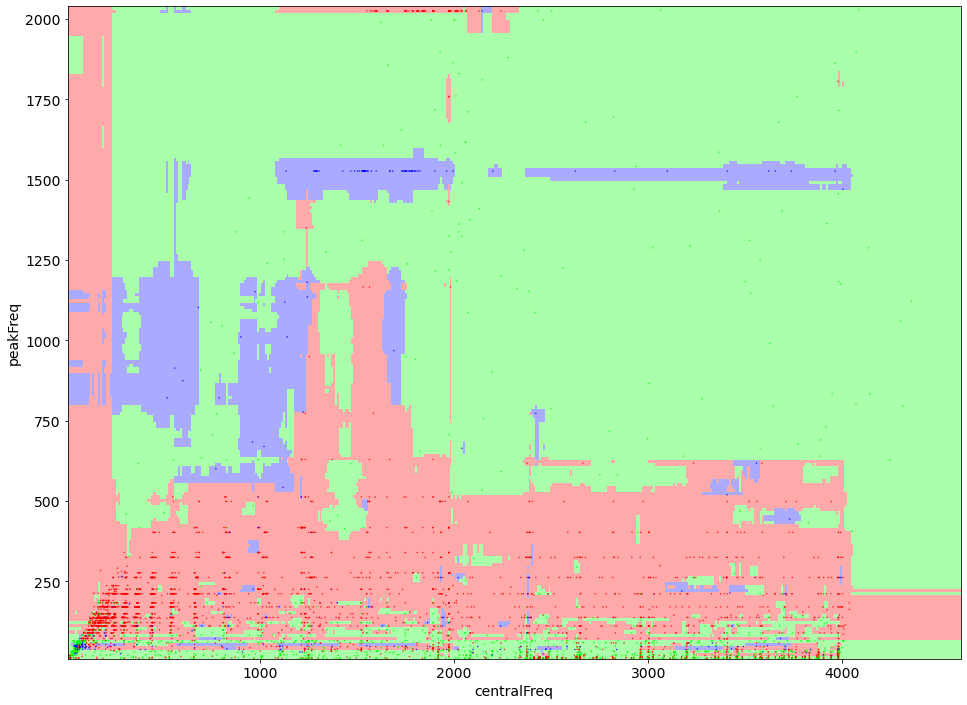

In [116]:
# Plot
plt.figure(figsize=(16,12))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Show predicted regions
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
# Show also training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Ydigits, cmap=cmap_bold, s=0.2)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(labelx)
plt.ylabel(labely)
plt.savefig("regions_both_RFC2.png")
plt.show()

In [117]:
# Use the best model to plot the results in 2D

labelx, labely = "centralFreq", "peakFreq"
#labelx, labely = "bandwidth", "peakFreq"
X = merged_df[[labelx, labely]]

# Read categories and turn them into digits
Y = merged_df['glitch label'].astype('category')
Ydigits = pd.factorize(Y)[0]

# Make a grid in the parameter space
h = 10
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Choose the model
clf2 = SVC(gamma=1.e-4, C=1.e3)
#clf = svm.SVC(gamma=1.e-5, C=1.e3)
#clf = KNeighborsClassifier(6)

# Fit, predict and reshape
clf2.fit(X.values, Ydigits)
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

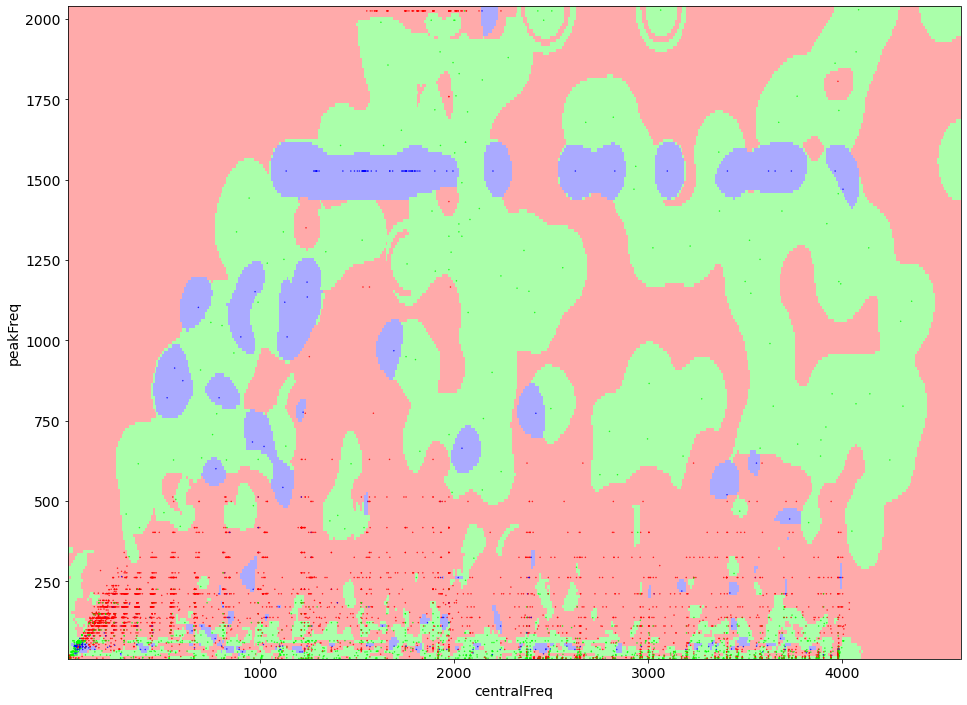

In [118]:
# Plot
plt.figure(figsize=(16,12))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Show predicted regions
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
# Show also training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Ydigits, cmap=cmap_bold, s=0.2)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(labelx)
plt.ylabel(labely)
plt.savefig("regions_both_SVM2.png")
plt.show()

In [119]:
# Use the best model to plot the results in 2D

labelx, labely = "centralFreq", "peakFreq"
#labelx, labely = "bandwidth", "peakFreq"
X = merged_df[[labelx, labely]]

# Read categories and turn them into digits
Y = merged_df['glitch label'].astype('category')
Ydigits = pd.factorize(Y)[0]

# Make a grid in the parameter space
h = 10
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Choose the model
clf2 = DecisionTreeClassifier()
#clf = svm.SVC(gamma=1.e-5, C=1.e3)
#clf = KNeighborsClassifier(6)

# Fit, predict and reshape
clf2.fit(X.values, Ydigits)
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

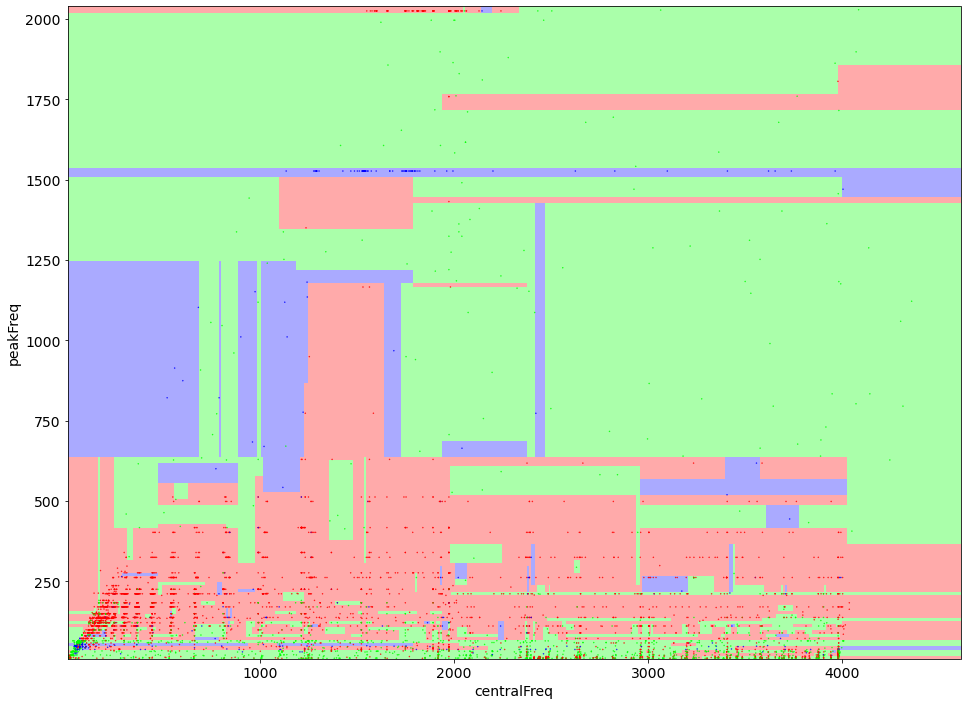

In [120]:
# Plot
plt.figure(figsize=(16,12))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Show predicted regions
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
# Show also training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Ydigits, cmap=cmap_bold, s=0.2)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(labelx)
plt.ylabel(labely)
plt.savefig("regions_both_DTC2.png")
plt.show()

- Code submitted by Rita Abani as a part of 

In [121]:
df_train.head()

,id,GPStime,centralFreq,peakFreq,snr,ifo,bandwidth,duration
0,HH9ABflByx,1.129517e+09,364.822,225.349,35.919,L1,665.643311,0.250
1,oTXUV2ynKq,1.135647e+09,3609.954,38.027,2743.555,H1,7209.994629,13.690
2,jQwe6arh9F,1.129802e+09,1838.466,2025.310,16.698,H1,3612.932861,0.375
3,g8bOTBroX2,1.131774e+09,2067.878,111.128,12.727,H1,4067.436523,0.105
4,7KAvyGygKM,1.130969e+09,3978.111,131.921,10.926,L1,7795.106934,2.304


In [122]:
df_test.head()

,id,GPStime,centralFreq,peakFreq,snr,ifo,bandwidth,duration
0,YVnrMXRcUP,1.132261e+09,2960.810,38.027,63.400,H1,5902.753418,2.000
1,qD8uxo1Jeu,1.132725e+09,1119.993,324.754,11.789,H1,2135.070557,0.070
2,Z5grpD4TOG,1.128422e+09,236.863,134.965,8.000,L1,211.306503,0.047
3,4TskgvMLa2,1.132886e+09,1905.332,137.711,14.362,H1,3742.343506,0.125
4,ZMEZmAs4gO,1.132755e+09,1119.433,170.654,9.087,H1,2174.645996,0.230


In [135]:
df_trn_labels.head()

,did,glitch label
0,d1,Blip
1,d2,Extremely_Loud
2,d3,Violin_Mode
3,d4,Blip
4,d5,Scratchy
